# 911 Calls Capstone Project

Here you can find a few analysis for some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert)

Description of the data:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [55]:
# Helper class to format text on print statements

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Dependencies

For this notebook, we have the following dependencies:
- Numpy
- Pandas
- Matplotlib
- Seaborn

If you don't have them installed, you can use the following commands on your terminal to install them:
- Numpy:
    - pip install numpy
    
- Pandas:
    - pip install pandas
    
- Matplotlib:
    - pip install matplotlib
    
- Seaborn:
    - pip install seaborn

## Import and Configuration

Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

Import visualization libraries and set %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Read in the csv file as a dataframe

In [3]:
df = pd.read_csv("911.csv")

Check the dataframe's information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Have a first look at the dataframe

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Quick Insights

In [15]:
print("{}Top 5 zipcodes:{}\n\n{}\n".format(color.BOLD, color.END, df['zip'].value_counts().head(5)))

print("{}Top 5 townships:{}\n\n{}\n".format(color.BOLD, color.END, df['twp'].value_counts().head(5)))

print("{}Unique call titles:{}\n\n{}".format(color.BOLD, color.END, df['title'].nunique()))


Top 5 zipcodes:

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships:

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique call titles:

110


## Processing

### Add features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. A new column will be created to store these identifiers.

To achieve this, a new column will be created applying a lambda function on the 'title' column where each value will be splitted using ':' as separator, and the value on the index 0 will be stored.

Example: *if the title column value is **EMS: BACK PAINS/INJURY** , the 'reason' column value would be **EMS**.*

In [17]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

# Show first 5 rows as an example.
df['reason'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

Probably, we would want to use the timestamps for further exploration.

If we want to proceed, we will need to convert the column 'timeStamps' into a datetime type.

Currently, the type of the 'timeStamp' column is object.

In [18]:
print("{}Type of 'timeStamp' column:{}\n\n{}".format(color.BOLD, color.END, df['timeStamp'].dtypes))

Type of 'timeStamp' column:

object


To convert from object to datetime, we will use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now that we have proper datetime values on 'timeStamp', let's add some extra columns 'hour', 'month', and 'day of week' that will give us information that we will use later on.

To achieve this, we will use some lambda functions again, and a dictionary to do some mapping of the 'day of week' values.

In [86]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

df['month'] = df['timeStamp'].apply(lambda x: x.month)

df['day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek).map({
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri',
    5:'Sat',
    6:'Sun'
})

In [87]:
print("{}Examples for the column 'hour':{}\n\n{}\n".format(color.BOLD, color.END, df['hour']))

print("{}Examples for the column 'month':{}\n\n{}\n".format(color.BOLD, color.END, df['month']))

print("{}Examples for the column 'day of week':{}\n\n{}\n".format(color.BOLD, color.END, df['day of week']))

Examples for the column 'hour':

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hour, Length: 99492, dtype: int64

Examples for the column 'month':

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: month, Length: 99492, dtype: int64

Examples for the column 'day of week':

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day of week, Length: 99492, dtype: object



## Visualization

Now that we have worked a little with the data, let's try to visualize some of it.

First, let's plot a count for 'reason':

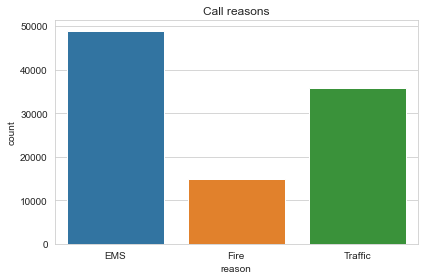

In [88]:
sns.countplot(x='reason',data=df)

# To set up a title
plt.title('Call reasons')

plt.tight_layout()

And now let's try it a little bit more specific:

### Call reasons by day of week

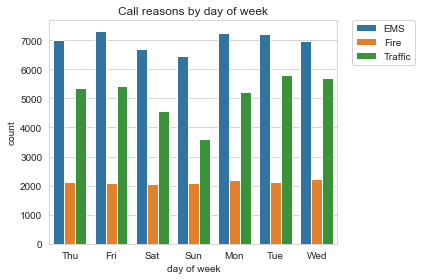

In [89]:
sns.countplot(x='day of week', data=df, hue='reason')

# To set up a title
plt.title('Call reasons by day of week')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

### Call reasons by month

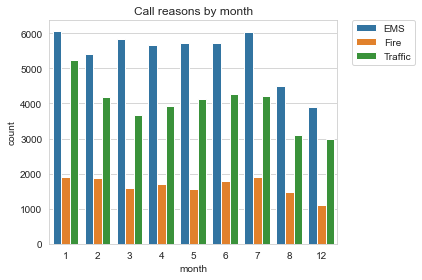

In [90]:
sns.countplot(x='month', data=df, hue="reason")

# To set up a title
plt.title('Call reasons by month')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()

What about some heatmaps? Let's try it!

### EMS for each day of week and hour

In [93]:
ems_day_hour = df[df['reason'] == 'EMS'].groupby(by=['day of week','hour']).count()['reason'].unstack()
ems_day_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,159,158,136,128,139,121,192,256,333,380,...,462,386,415,369,377,359,350,301,274,247
Mon,178,149,134,138,151,155,221,287,366,408,...,409,362,425,375,342,355,293,250,258,191
Sat,215,169,166,167,138,149,157,203,264,322,...,359,353,384,354,362,344,349,298,245,219
Sun,219,177,166,174,142,126,175,212,269,339,...,342,333,320,347,293,354,298,262,241,207
Thu,158,122,162,114,128,133,172,252,323,389,...,387,407,351,367,375,349,331,288,235,206


Text(0.5, 1.0, 'EMS')

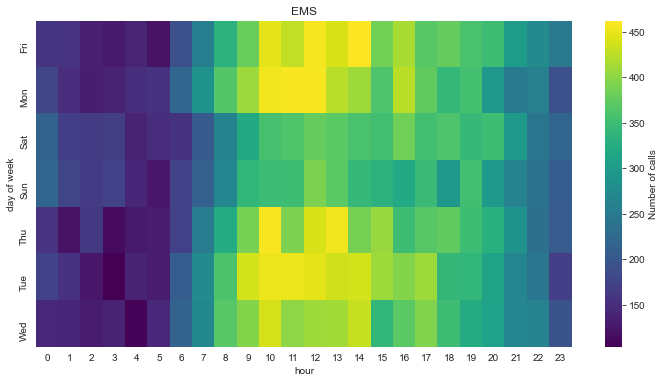

In [94]:
# To set up figure's size
plt.figure(figsize=(12,6))

sns.heatmap(ems_day_hour,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('EMS')

Quick knowledge that we can get for *Emergency Medical Services* (EMS):
- Most of the calls come in during week days (Mon - Fri).
- The peak time seems to be beween 10:00 and 14:00.
- During week days (Mon - Fri) there are not many call during the night. This clearly changes on weekends, specifically between 23:00 and 03:00.

### Fire for each day of week and hour

In [95]:
fire_day_hour = df[df['reason'] == 'Fire'].groupby(by=['day of week','hour']).count()['reason'].unstack()
fire_day_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,45,23,23,27,28,26,48,89,108,111,...,126,121,135,134,140,100,106,76,73,72
Mon,39,31,35,20,29,42,56,79,109,102,...,123,138,126,157,178,142,128,76,75,56
Sat,56,49,32,29,34,32,34,56,61,99,...,115,133,127,117,146,133,100,102,85,92
Sun,61,46,41,33,31,58,40,79,102,104,...,109,124,111,123,135,117,98,80,65,59
Thu,43,33,24,28,26,25,48,59,86,113,...,135,134,120,142,127,127,110,97,70,47


Text(0.5, 1.0, 'Fire')

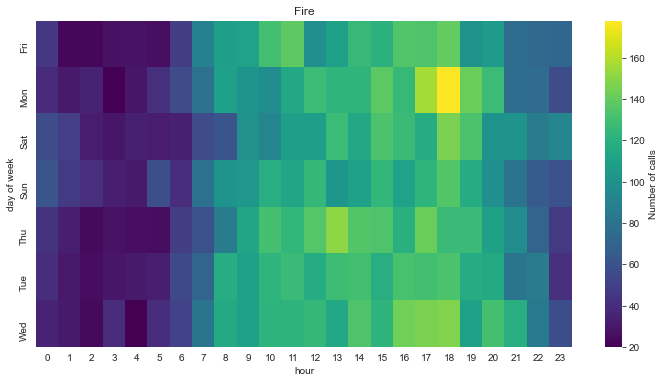

In [96]:
# To set up figure's size
plt.figure(figsize=(12,6))

sns.heatmap(fire_day_hour,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('Fire')

Quick knowledge that we can get for *Fires*:
- Most of the calls were made in the afternoon.
- There are no major differences between days, except for the spike on Mondays at 18:00.
- During week days (Mon - Fri) there are not many call during the night. This clearly changes on weekends, specifically between 22:00 and 01:00.

### Traffic for each day of week and hour

In [97]:
traffic_day_hour = df[df['reason'] == 'Traffic'].groupby(by=['day of week','hour']).count()['reason'].unstack()
traffic_day_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,71,54,32,20,34,47,132,253,301,261,...,344,473,489,477,303,237,211,182,167,155
Mon,65,41,32,36,24,70,120,287,344,276,...,337,413,438,465,365,249,192,171,139,78
Sat,104,83,65,64,52,50,66,132,134,219,...,315,310,337,286,270,219,179,172,176,156
Sun,103,83,79,61,69,56,85,111,112,177,...,233,234,232,244,242,184,141,119,109,64
Thu,77,47,47,17,28,45,142,259,368,326,...,354,428,464,504,308,222,176,168,119,101


Text(0.5, 1.0, 'Traffic')

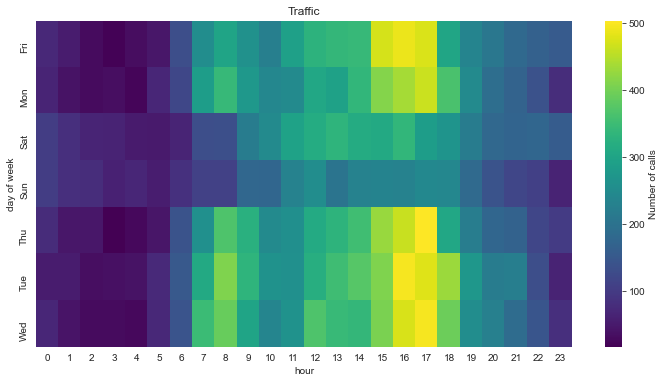

In [98]:
# To set up figure's size
plt.figure(figsize=(12,6))

sns.heatmap(traffic_day_hour,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('Traffic')

Quick knowledge that we can get for *Traffic*:
- We can clearly see that the number of calls increase drastically on peak traffic activity times. This would be between 15:00 and 18:00, time where most of people go back to their homes from work.
- We can identify also a small increase early in the morning between 06:00 and 09:00, time where most of people drive to schools and work.
- There is also a small increase on Fridays and Saturdays in the evening.

### EMS for each month and day of week

In [99]:
ems_day_month = df[df['reason'] == 'EMS'].groupby(by=['day of week','month']).count()['reason'].unstack()
ems_day_month.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,982,765,780,1002,810,778,1040,629,529
Mon,799,934,789,813,912,797,767,766,663
Sat,931,721,696,892,725,755,907,578,480
Sun,969,674,683,693,792,665,913,540,527
Thu,769,746,973,770,817,973,801,568,576


Text(0.5, 1.0, 'EMS')

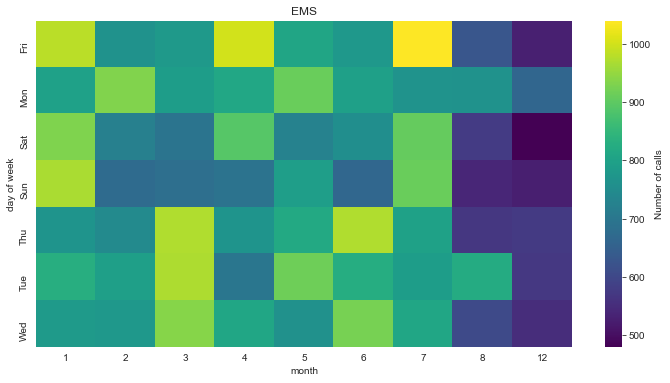

In [100]:
# To set up figure's size
plt.figure(figsize=(12,6))

sns.heatmap(ems_day_month,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('EMS')

Quick knowledge that we can get for *EMS*:
- We notice that August and December have less calls but this can also be because of data quantity. There is no information between September and November, and maybe for August there is less data as well.

It is not easy to identify some good insights for EMS. Maybe we could try to add some clustering to the heatmap...

Text(0.5, 1.0, 'EMS with Clustering')

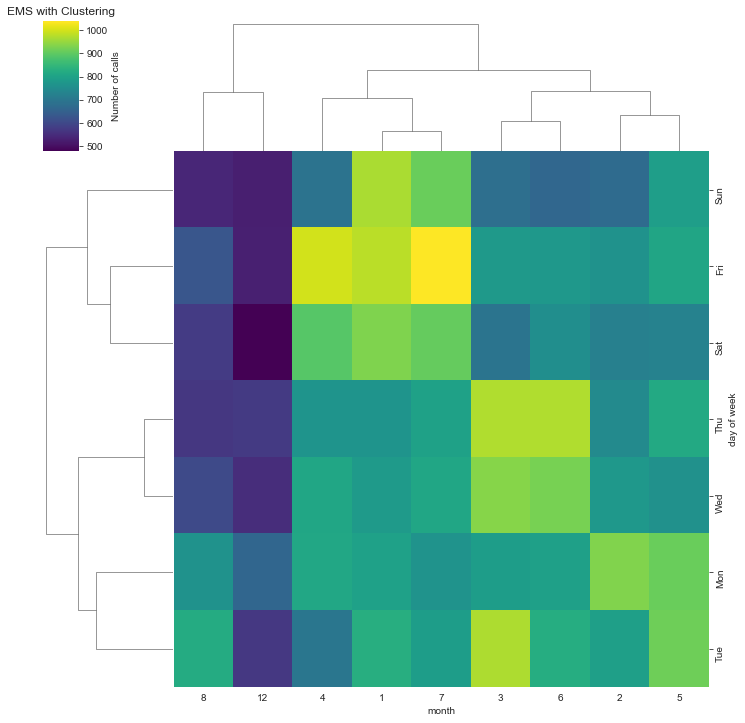

In [107]:
sns.clustermap(ems_day_month,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('EMS with Clustering')

From the EMS clustering, we can extract the following:
- There are some months that behave similarly:
    - January and July.
    - March and June.
    - February and May.
    - August and December (this again could be do to missing/incompleted information)
- There are also day that behave similarly:
    - Friday and Saturday.
    - Wednesday and Thursday.
    - Monday and Tuesday.

### Fire for each month and day of week

In [101]:
fire_day_month = df[df['reason'] == 'Fire'].groupby(by=['day of week','month']).count()['reason'].unstack()
fire_day_month.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,255,206,196,280,226,247,285,222,171
Mon,242,309,228,218,251,245,338,230,143
Sat,324,238,193,271,221,203,275,191,152
Sun,349,227,160,292,212,253,276,173,134
Thu,235,241,256,240,209,321,237,204,193


Text(0.5, 1.0, 'Fire')

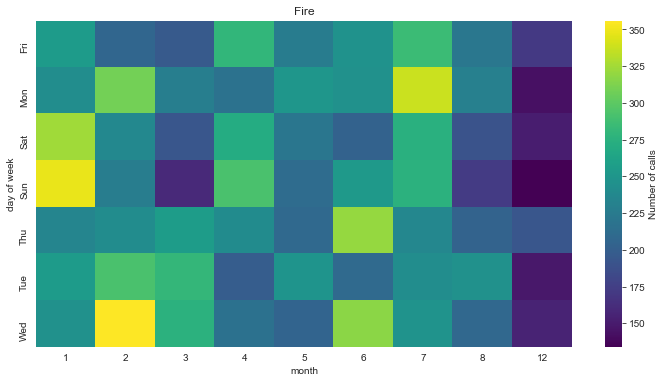

In [102]:
# To set up figure's size
plt.figure(figsize=(12,6))

sns.heatmap(fire_day_month,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('Fire')

Quick knowledge that we can get for *Fire*:
- We can see that on January and February, there is an increase on calls. This could be due to the fact that during winter months people try to make their home warmer.
- Also, during June and July there is an increase on calls. This could be due to wildfires and heatwaves during summer.

### Traffic for each month and day of week

In [103]:
traffic_day_month = df[df['reason'] == 'Traffic'].groupby(by=['day of week','month']).count()['reason'].unstack()
traffic_day_month.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,733,610,549,676,694,624,720,459,365
Mon,686,721,518,567,616,575,587,515,451
Sat,1036,482,377,571,498,430,513,330,346
Sun,642,328,259,503,420,415,483,308,246
Thu,580,609,671,591,564,771,608,458,497


Text(0.5, 1.0, 'Traffic')

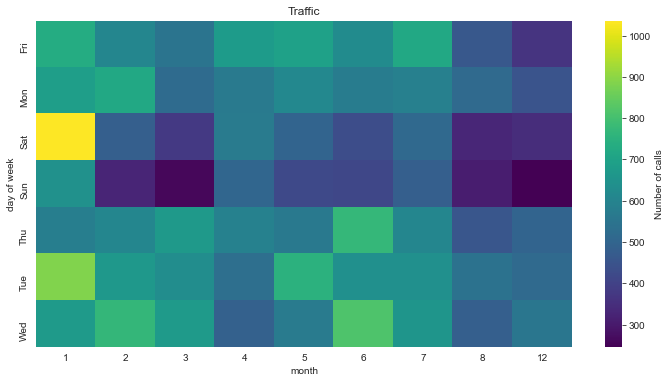

In [104]:
# To set up figure's size
plt.figure(figsize=(12,6))

sns.heatmap(traffic_day_month,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('Traffic')

Quick knowledge that we can get for *Traffic*:
- There is a clear peak on Saturdays during January.
- During the year, Tuesdays seem to be the day where most of calls get made.

Let's see if we can get some more information applying clustering...

Text(0.5, 1.0, 'Traffic with Clustering')

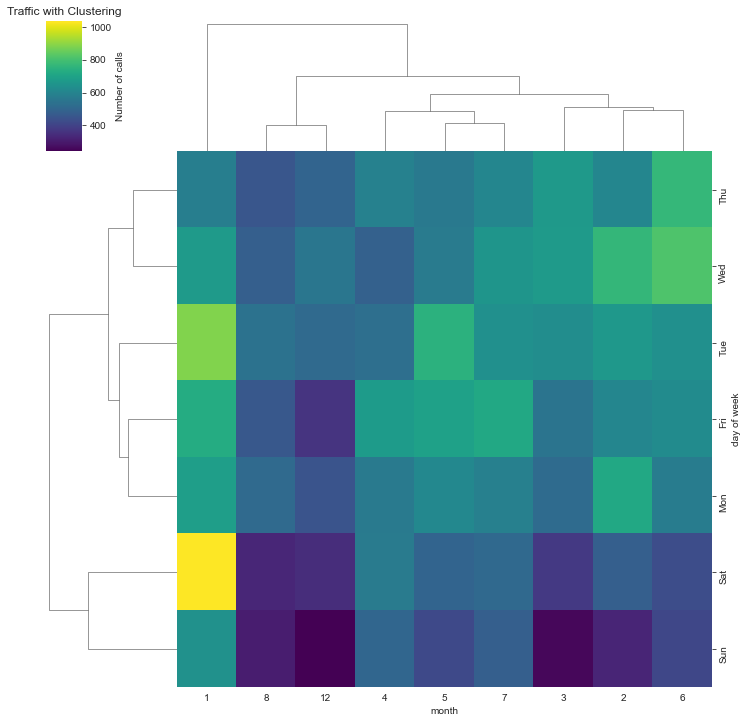

In [108]:
sns.clustermap(traffic_day_month,cmap='viridis', cbar_kws={'label': 'Number of calls'})

# To set up a title
plt.title('Traffic with Clustering')

Quick knowledge that we can get for *Traffic*:
- Once again, we find some days that behave similarly:
    - Saturday and Sunday.
    - Monday and Friday.
    - Wednesday and Thursday.

## Last words

If you have made it all the way until this point, awesome!

I wanted to do some small work using Pandas, and Seaborn so I won't forget some concepts, and won't lose some skills!

Thanks for taking the time to go through this simple Notebook, and if you have any feedback or comments, you can contact me via Email: jaimefvs@gmail.com